# Section 1.1 - Orbit Insertion DV

In [1]:
import numpy as np
from astropy.time import Time
from AMAT.arrival import Arrival

In [2]:
arrival1 = Arrival()
arrival1.set_vinf_vec_from_lambert_arc(lastFlybyPlanet='EARTH',
                                      arrivalPlanet='MARS',
                                      lastFlybyDate=Time("2024-10-01 00:00:00", scale='tdb'),
                                      arrivalDate=Time("2025-09-03 00:00:00", scale='tdb'),
                                      ephem_file='../../../spice-data/de432s.bsp')

In [3]:
print("Arrival v_inf vector, ICRF: "+str(arrival1.v_inf_vec)+" km/s")
print("Arrival VINF MAG: "+str(round(arrival1.v_inf_mag, 2))+" km/s.")
print("Arrival Declination: "+str(round(arrival1.declination, 2))+" deg.")

Arrival v_inf vector, ICRF: [-0.99752618  1.63758919  1.73292484] km/s
Arrival VINF MAG: 2.58 km/s.
Arrival Declination: 6.03 deg.


In [4]:
arrival2 = Arrival()
arrival2.set_vinf_vec_from_lambert_arc(lastFlybyPlanet='EARTH',
                                      arrivalPlanet='VENUS',
                                      lastFlybyDate=Time("2010-05-10 00:00:00", scale='tdb'),
                                      arrivalDate=Time("2010-12-06 00:00:00", scale='tdb'),
                                      ephem_file='../../../spice-data/de432s.bsp')

In [5]:
print("Arrival v_inf vector, ICRF: "+str(arrival2.v_inf_vec)+" km/s")
print("Arrival VINF MAG: "+str(round(arrival2.v_inf_mag, 2))+" km/s.")
print("Arrival Declination: "+str(round(arrival2.declination, 2))+" deg.")

Arrival v_inf vector, ICRF: [-3.26907095  0.67649492 -1.06977471] km/s
Arrival VINF MAG: 3.51 km/s.
Arrival Declination: -21.93 deg.


In [6]:
from AMAT.approach import Approach

In [7]:
approach1 = Approach("MARS", v_inf_vec_icrf_kms=arrival1.v_inf_vec,
                            rp=(3389.5+200)*1e3, psi=1.135*np.pi)

In [8]:
approach2 = Approach("VENUS", v_inf_vec_icrf_kms=arrival2.v_inf_vec,
                            rp=(6051.8+200)*1e3, psi=np.pi)

In [9]:
from AMAT.orbiter import PropulsiveOrbiter

In [10]:
apo_altitudes = np.linspace(200, 60E3, 1001)
mar_OI_DV = np.array([])
ven_OI_DV = np.array([])

for alt in apo_altitudes:
    orbiter1 = PropulsiveOrbiter(approach=approach1, apoapsis_alt_km=alt)
    orbiter2 = PropulsiveOrbiter(approach=approach2, apoapsis_alt_km=alt)
    
    mar_OI_DV = np.append(mar_OI_DV, orbiter1.DV_OI_mag)
    ven_OI_DV = np.append(ven_OI_DV, orbiter2.DV_OI_mag)

In [11]:
import matplotlib.pyplot as plt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


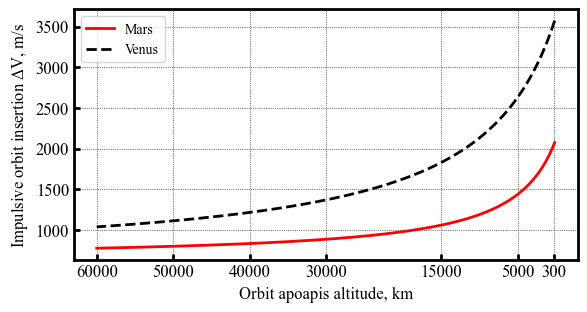

In [12]:
fig = plt.figure()
fig.set_size_inches([6.5, 3.25])

plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(apo_altitudes, mar_OI_DV, linestyle='solid', color='r', linewidth=2.0, label="Mars")
plt.plot(apo_altitudes, ven_OI_DV, linestyle='dashed', color='k',  linewidth=2.0, label="Venus")

plt.ylabel('Impulsive orbit insertion ' + r'$\Delta V$' + ', m/s',fontsize=12)
plt.xlabel('Orbit apoapis altitude, km',fontsize=12)
plt.xticks(np.array([300, 5E3, 15E3, 30E3, 40E3, 50E3, 60E3]),fontsize=12)
plt.yticks(fontsize=12)
plt.grid('on',linestyle='-', linewidth=0.2)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.invert_xaxis()


for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.legend(loc='upper left', fontsize=10, framealpha=0.8)

plt.savefig('../../../data/mdpi-aerospace/smallsat-mission-concepts/orbit-insertion-DV.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/mdpi-aerospace/smallsat-mission-concepts/orbit-insertion-DV.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/mdpi-aerospace/smallsat-mission-concepts/orbit-insertion-DV.eps', dpi=300,bbox_inches='tight')

plt.show()